In [4]:
!pip install gensim
!pip install matplotlib


DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.0/154.0 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 69.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.0/311.0 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 57.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 62.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 11.9 MB/s eta 0:00:00
DEPRECATION: omegaconf 2.0.6 has a non-standard depe

In [5]:
from deepwalk import deepwalk, generate_walks, random_walk
%load_ext autoreload
%autoreload 2

"""
Deep Learning on Graphs - ALTEGRAD - Nov 2023
"""

import numpy as np
import networkx as nx
from random import randint
from gensim.models import Word2Vec
G = nx.star_graph(5)
walks = generate_walks(G, 10, 5)
np.array(walks).shape


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(60, 5)

In [7]:
"""
Deep Learning on Graphs - ALTEGRAD - Nov 2023
"""

import networkx as nx
import numpy as np
from deepwalk import deepwalk
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Loads the web graph
G = nx.read_weighted_edgelist('../data/web_sample.edgelist', delimiter=' ', create_using=nx.Graph())
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


############## Task 3
# Extracts a set of random walks from the web graph and feeds them to the Skipgram model
n_dim = 128
n_walks = 10
walk_length = 20

# OPTIONAL
# # Create a mapping from strings to integers
# node_mapping = {node: i for i, node in enumerate(G.nodes())}

# # Create a reverse mapping if you need to convert back to strings later
# reverse_mapping = {i: node for node, i in node_mapping.items()}

# G_int = nx.relabel_nodes(G, node_mapping)

Number of nodes: 33226
Number of edges: 354529


In [8]:
n_dim = 128
n_walks = 10
walk_length = 20
walks = generate_walks(G, n_walks, walk_length)

In [11]:
np.array(walks).shape

(332260, 20)

In [9]:
model = Word2Vec(vector_size=n_dim, window=8, min_count=0, sg=1, workers=4, hs=1)
model.build_vocab(walks)

In [12]:
model.train(walks, total_examples=model.corpus_count, epochs=5)

(32270913, 33226000)

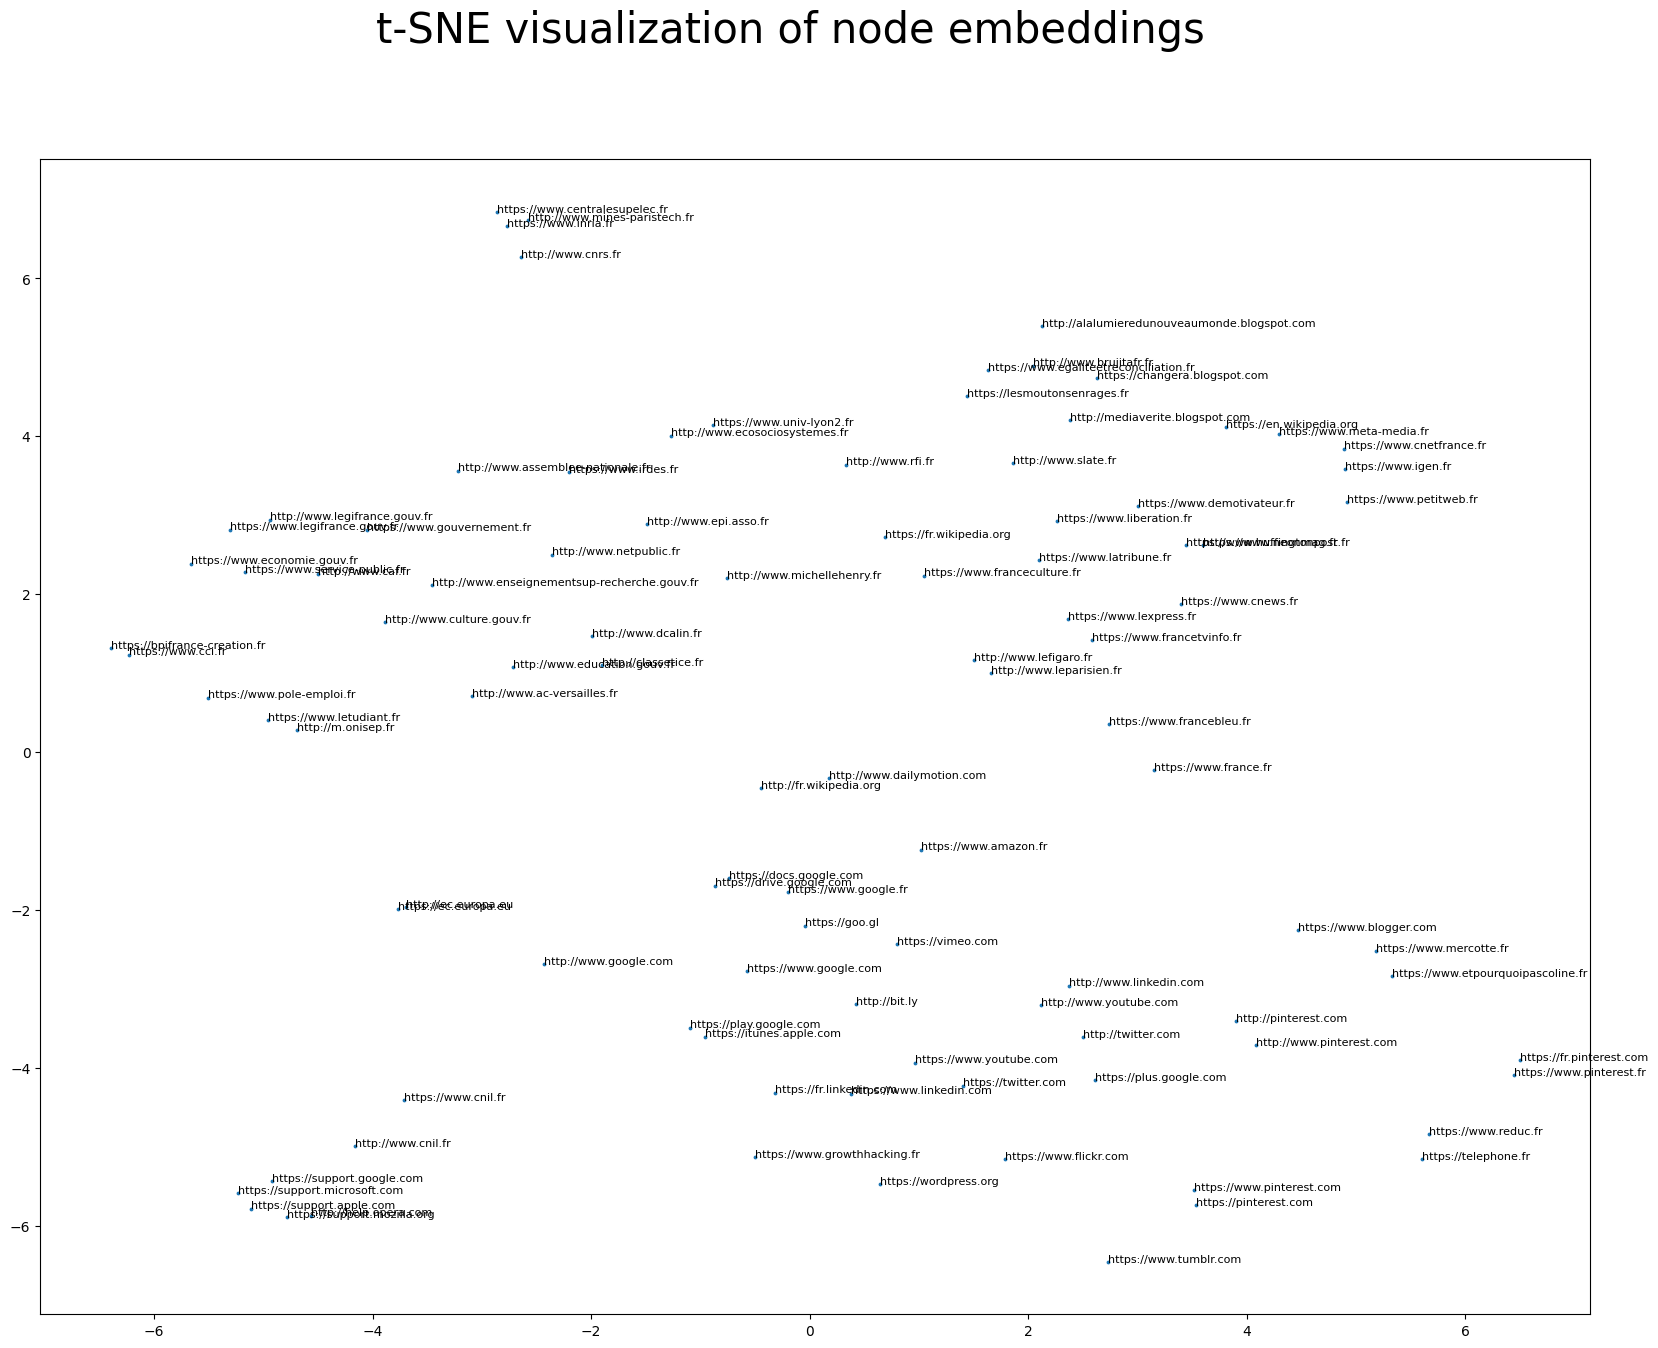

In [16]:
############## Task 4
# Visualizes the representations of the 100 nodes that appear most frequently in the generated walks
def visualize(model, n, dim):

    nodes = model.wv.index_to_key[:n]
    
    DeepWalk_embeddings = np.empty(shape=(n, dim))

    for idx, node in enumerate(nodes):
        DeepWalk_embeddings[idx, : ] = model.wv[node]


    my_pca = PCA(n_components=10)
    my_tsne = TSNE(n_components=2)

    vecs_pca = my_pca.fit_transform(DeepWalk_embeddings)
    vecs_tsne = my_tsne.fit_transform(vecs_pca)

    fig, ax = plt.subplots()
    ax.scatter(vecs_tsne[:,0], vecs_tsne[:,1],s=3)
    for x, y, node in zip(vecs_tsne[:,0] , vecs_tsne[:,1], nodes):     
        ax.annotate(node, xy=(x, y), size=8)
    fig.suptitle('t-SNE visualization of node embeddings',fontsize=30)
    fig.set_size_inches(20,15)
    plt.savefig('embeddings.pdf')  
    plt.show()


visualize(model, 100, n_dim)
